In [1]:
%matplotlib inline
from aosM1M3 import aosM1M3
from aosM2 import aosM2
from aosTeleState import aosTeleState
from aosMetric import aosMetric
from aosWFS import aosWFS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
debugLevel = 0

In [3]:
M1M3 = aosM1M3(debugLevel)
M2 = aosM2(debugLevel)

In [4]:
inst = 'lsst'
simuParam = 'GTt'
iSim = 48
ndofA = 50
phosimDir = '../../phosimSE/'
pertDir = '../pert/sim%d' % iSim
imageDir = '../image/sim%d' % iSim
band = 'g'
wavelength = 0.5 #micron
enditer = 5 #can be anything in this example

In [5]:
state = aosTeleState(inst, simuParam, iSim,
                         ndofA, phosimDir,
                         pertDir, imageDir, band, wavelength,
                         enditer,
                         debugLevel, M1M3=M1M3, M2=M2)

/Applications/miniconda/envs/p3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


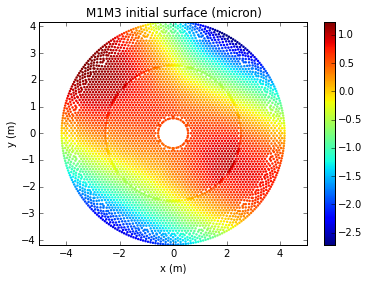

In [6]:
#plot M1M3 surface
plt.scatter(M1M3.bx, M1M3.by, s=25, c=state.M1M3surf, marker='.', edgecolor='none')
plt.axis('equal')
outerR = 4.18
plt.xlim(-outerR, outerR)
plt.ylim(-outerR, outerR)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title('M1M3 initial surface (micron)') #micron because we have *1e6 with plt.scatter

/Applications/miniconda/envs/p3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


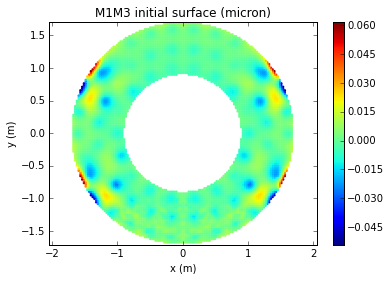

In [7]:
#plot M2 surface
plt.scatter(M2.bx, M2.by, s=25, c=state.M2surf, marker='.', edgecolor='none')
plt.axis('equal')
outerR = 1.71
plt.xlim(-outerR, outerR)
plt.ylim(-outerR, outerR)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title('M1M3 initial surface (micron)') #micron because we have *1e6 with plt.scatter

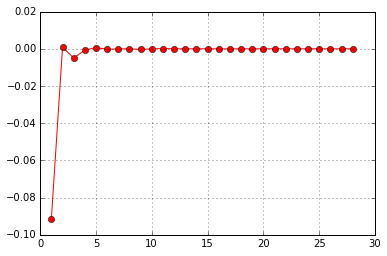

In [14]:
#plot Zernikes on L2S2
x = np.arange(state.znPert)+1
plt.plot(x, state.L2S2zer,  label='L2S2 Zernikes', marker='o', color='r')
plt.grid()

znwcs3=19
(76, 1)
[[  3.40545000e-02]
 [ -1.65625000e-01]
 [ -8.43400000e-12]
 [  5.83250000e-02]
 [  5.83250000e-02]]


/Applications/miniconda/envs/p3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


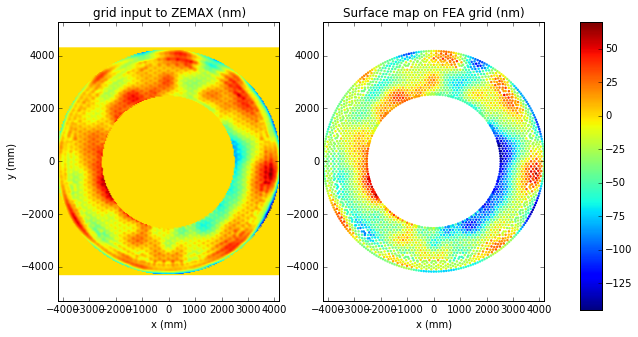

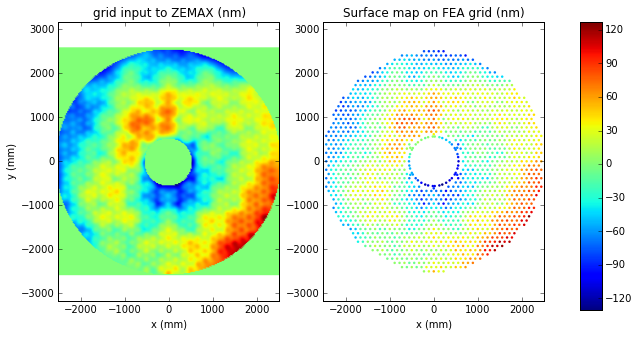

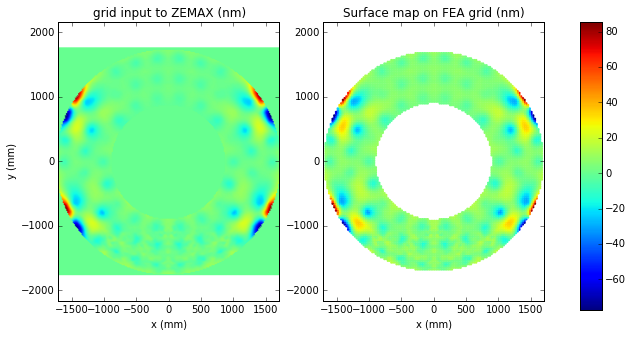

In [22]:
#this writes out the following files to be used by PhoSim
# pert/sim48/iter0/sim48_iter0_pert.txt  (50 numbers for 50 DOF. empty for iter=0 because no control command applied)
znwcs = 22-3 #minus piston, tip, tilt
iIter = 1
#setIterNo needs to know where to write the WFS-related files
wfs = aosWFS(cwfsDir, inst, algoFile,imgSizeinPix, band, wavelength, 3)
#setIterNo needs to know where to write the metrics
metr = aosMetric(inst, state.opdSize, znwcs, debugLevel) 
state.setIterNo(metr, iIter, wfs)  #set this so that we can properly name the Pert files below
state.writePertFile(ndofA, M1M3=M1M3, M2=M2)

In [10]:
state.writeOPDinst(metr)

In [11]:
state.writeOPDcmd(metr)

In [23]:
cwfsDir = '../../../wavefront/cwfs/'
algoFile = 'exp'
imgSizeinPix = 128
band = 'g'
state.writeWFSinst(wfs, metr)

In [24]:
state.writeWFScmd(wfs)